# Q0:

1. What makes a model “linear”? “Linear” in what?
- A model is linear in terms of the parameters (the coefficients that you use to multiply your features). The relationship between the target and its feature(s) can be represented by a linear combination of coefficients, represented by the beta values.

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There’s further explanation at the end of this document, if needed.
- When dealing with a one-hot-encoded variable, the columns represent each category from the original variable. Because of this, the one-hot encoded columns for each categorical variable can be derived from eachother.
- When creating your model, you drop one of the one-hot encoded category columns to use as a reference column. Now, your coefficients will represent the difference in each category to the reference category in terms of your target variable.

3. Can linear regression be used for classification? Explain why, or why not.
- Yes. Classification involves categorical variables which can be one-hot encoded into binary variables. You could hypothetically fit a model to binary values, but since linear regression produces continuous values and you can only have two options (1 or 0), you would have to specify a boundary for classification so it's not ideal.

4. If you have a high accuracy on training but low on testing, what might be the problem? It’s also possible you’ll see a pattern in the residuals.
- The problem may be that the model overfit the training data and is not as successful with a more general case. Residuals (differences between actual and predicted values) show how fit the data is, and certain patterns can represent overfitting.

5. Review this page: Non-Linear with Linear What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable y and your features/control/response/independent variables x?
- One way to add non-linear relationships to your variables is through modifying your data to include adjusted values, such as squared or cubed features (as we did in our most recent DS3025 lab). This can also be achieved using sklearn's PolynomialFeatures extension.
- Another way to add non-linear relationships is through kernels. You can change the weights of the dataset to reflect importance of each feature.

6. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
- The intercept represents the predicted values for the target variable by itself when the coefficients of the features are all set to 0.
- A slope coefficient for a variable represents how much the target variable changes when the value of the individual variable changes.
- The coefficient for a dummy/one-hot encoded variable, as described above, represents the difference in each category of a categorical variable to the reference category in terms of your target variable.

# **Q1**

1.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['price', 'scores', 'neighborhood', 'prop_type', 'room_type'], dtype='object')
               average_price  average_score
neighborhood                               
Bronx              75.276498      91.654378
Brooklyn          127.747378      92.363497
Manhattan         183.664286      91.801496
Queens             96.857233      91.549057
Staten Island     146.166667      90.843750


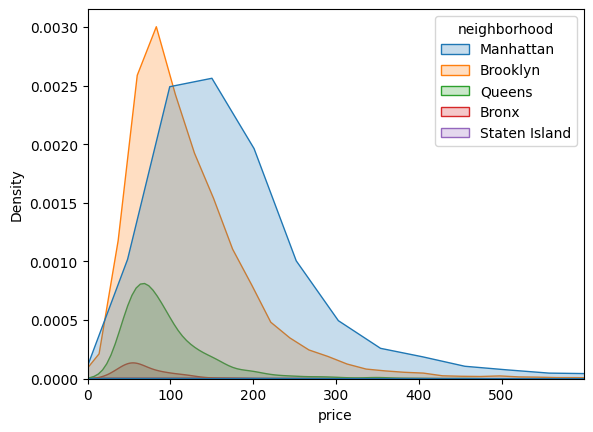

In [155]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

q1_clean = pd.read_csv("/content/drive/My Drive/Q1_clean.csv")

'''
Price: price per night
Review Scores Rating: The average rating for the property
Neighborhood : The bourough of NYC. Note the space, or rename the variable.
Property Type: The kind of dwelling
Room Type: The kind of space being rented
'''

# changed column names because they were annoying me
q1_clean.columns = ["price","scores","neighborhood","prop_type", "room_type"]
print(q1_clean.columns)

summary = q1_clean.groupby('neighborhood').agg(
    average_price=('price', 'mean'),
    average_score=('scores', 'mean')
)
print(summary)

# The most expensive neighborhood on average is Manhattan.

sns.kdeplot(data=q1_clean, x="price", hue="neighborhood", fill=True)
plt.xlim(0, q1_clean["price"].quantile(0.99))
plt.show()


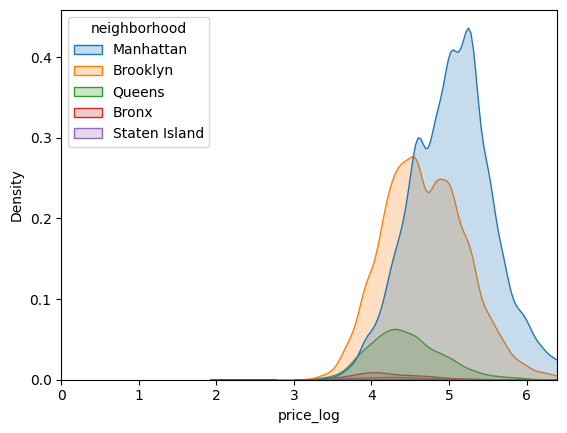

In [156]:
# log density plot
q1_clean["price_log"] = np.log1p(q1_clean['price'])
sns.kdeplot(data=q1_clean, x="price_log", hue="neighborhood", fill=True)
plt.xlim(0, q1_clean["price_log"].quantile(0.99))
plt.show()

**2.**

In [157]:
from sklearn.linear_model import LinearRegression

# one hot encode neighborhood
q1_clean2 = pd.get_dummies(q1_clean, columns=["neighborhood"])

#make numpy arrays
X = q1_clean2.drop(columns=["price", "scores","prop_type","room_type"]).values
y = q1_clean2["price"].values

reg = LinearRegression(fit_intercept=False).fit(X, y) # Fit the linear model

#mean_prices = q1_clean.groupby("neighborhood")["price"].mean()
coefficients = reg.coef_
print(coefficients)

[ 194.32340986 -744.90738262 -784.59221554 -797.57301841 -768.76512387
 -710.50202565]


The coefficients are equal to the average price for each neighborhood from the summary table in part 1. The coefficients represent the average differences in the categories to the target variable (price).

**3.**


In [158]:
# same as above but with intercept left in
q1_clean2 = pd.get_dummies(q1_clean, columns=["neighborhood"],drop_first = True)
reg2 = LinearRegression().fit(X, y) # Fit the linear model

#mean_prices = q1_clean.groupby("neighborhood")["price"].mean()
coefficients2 = reg2.coef_
print(coefficients2)


[194.32340986  16.3605706  -23.32426232 -36.30506519  -7.49717066
  50.76592757]


When creating the dummies, you have to include drop_first= True to drop one category as a reference (as explained in Q0). The intercept is the average price (target variable) for the dropped category. With the intercept left in, the coefficients represent the difference in average to the reference categorical variable dropped during OHE rather than the values of the dependent for each category.

To get the coefficients without the intercept from those with the intercept, you can just add the intercept term (mean price for the reference category that you dropped) to each coefficient for the categories that weren't dropped.

4.

In [159]:
#Split the sample 80/20 into a training and a test set
from sklearn.model_selection import train_test_split
X = q1_clean.drop(columns=["price", "prop_type","room_type"])
y = q1_clean["price"]
# OHE
X2 = pd.get_dummies(X, columns=['neighborhood'], drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(X2, y, test_size=0.2)
reg = LinearRegression().fit(X_train,Y_train)
coefficients = reg.coef_
predictions = reg.predict(X_test)


# R^2
r_squared = reg.score(X_test, Y_test)
# print(r_squared)
squared_errors = (Y_test - predictions) ** 2  # Calculate squared errors
mse = np.mean(squared_errors)  # Calculate the mean of squared errors
rmse = np.sqrt(mse)  # Take the square root to get RMSE
print(rmse) # 128.085
# this feels high idk

# scores coefficients
cf_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': reg.coef_})
score_cf = coef_df.loc[cf_df['Feature'] == 'scores', 'Coefficient'].values
print(score_cf) # 1.075

# most expensive neighborhood
neighborhood_cfs = cf_df[cf_df['Feature'].str.contains("neighborhood")]

max_neighborhood = neighborhood_cfs.sort_values(by="Coefficient", ascending=False).iloc[0]
print(max_neighborhood) # Manhattan is the most expensive property you can rent


61.26374424845069
[1.07482145]
Feature        neighborhood_Staten Island
Coefficient                     52.017545
Name: 5, dtype: object


6. What does the coefficient on review scores rating mean if it changes from part 4 to 5? hint: think about how multiple linear regression works.

# Q2

1.

In [160]:

'''
Price, Color, Seating_Capacity
Body_Type: crossover, hatchback, muv, sedan, suv
Make, Make_Year: The brand of car and year produced
Mileage_Run: The number of miles on the odometer
Fuel_Type: Diesel or gasoline/petrol
Transmission, Transmission_Type: speeds and automatic/manual
'''

cars = pd.read_csv("/content/drive/My Drive/cars_hw.csv")
#print(cars.dtypes)
#print(cars[["Price"]].describe())
# categorical:
# Body_Type has 5 categories
# Make has 16 categories
# Color has 15
# No_of_Owners has 3
# Fuel_Type has 3
# Transmission has 5 (5-speed)
# Transmission_Type has 2 (Manual or Automatic)

# numeric:
# Make_Year ranges from 2011 to 2022
# Mileage_Run ranges from 1117 to 99495
# Seating_Capacity ranges from 4 to 8
# Price ranges from 188000 to 2941000

num_cols = ["Make_Year", "Mileage_Run", "Seating_Capacity", "Price"]

Q1 = cars[num_cols].quantile(0.25)
Q3 = cars[num_cols].quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
# Make_Year = 4, Seating_Capacity = 0. do not need to touch these/other two are high

# remove outliers for Mileage_Run and Price
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove outliers
cars2 = cars[(cars["Mileage_Run"] >= lower_bound["Mileage_Run"]) &
                  (cars["Mileage_Run"] <= upper_bound["Mileage_Run"]) &
                  (cars["Price"] >= lower_bound["Price"]) &
                  (cars["Price"] <= upper_bound["Price"])]
# log transformation for price
cars2["Price"] = np.log(cars2["Price"])
# arcsin transformation for mileage run
cars2["Mileage_Run"] = np.arcsinh(cars2["Mileage_Run"])


Q1 = cars2[num_cols].quantile(0.25)
Q3 = cars2[num_cols].quantile(0.75)
IQR2 = Q3 - Q1
#print(IQR2)




<ipython-input-160-7bec40ff6d72>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2["Price"] = np.log(cars2["Price"])
<ipython-input-160-7bec40ff6d72>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2["Mileage_Run"] = np.arcsinh(cars2["Mileage_Run"])


2.

count    922.000000
mean      13.352109
std        0.388765
min       12.144197
25%       13.048178
50%       13.380102
75%       13.637280
max       14.197366
Name: Price, dtype: float64


<ipython-input-161-d3a9e55f3442>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars2["Price"], shade=True, color="pink")


<Axes: xlabel='Price', ylabel='Density'>

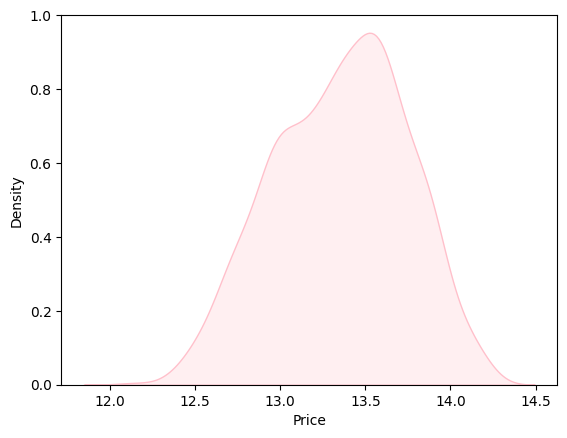

In [161]:
# Summarize the Price variable and create a kernel density plot
print(cars2["Price"].describe())
# 922 values, mean = 13.35, std = 0.3888, min = 12.14, 0.25=13, 0.5 = 13.38, 0.75 = 13.64, max = 14.2, dtype = float

sns.kdeplot(cars2["Price"], shade=True, color="pink")


In [162]:
cars2.groupby("Make")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,12.919895,0.480975,12.495004,12.568392,12.752286,13.171681,13.701221
Datsun,3.0,12.576047,0.036311,12.538967,12.558302,12.577636,12.594587,12.611538
Ford,52.0,13.468280,0.210895,12.577636,13.361380,13.469493,13.575984,13.879424
Honda,72.0,13.526470,0.328588,12.663497,13.272075,13.565089,13.724216,14.159809
Hyundai,304.0,13.365215,0.395255,12.421184,13.091388,13.366094,13.636683,14.196683
Jeep,1.0,14.070153,NaN,14.070153,14.070153,14.070153,14.070153,14.070153
Kia,1.0,14.129591,NaN,14.129591,14.129591,14.129591,14.129591,14.129591
Mahindra,18.0,13.898953,0.159906,13.587354,13.851808,13.905680,13.961249,14.197366
Maruti Suzuki,293.0,13.218132,0.371409,12.375815,12.926348,13.174956,13.546323,13.966513


<ipython-input-163-946ccb45fd10>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=cars2, x="Price", hue="Make", palette=palette, linewidth=2)


<Axes: xlabel='Price', ylabel='Density'>

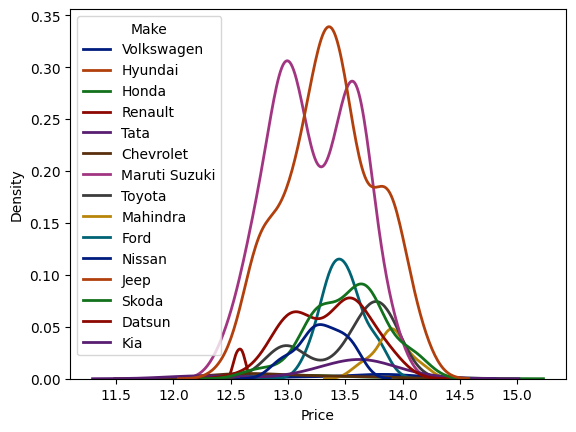

In [163]:
palette = sns.color_palette("dark", len(cars2["Make"].unique()))

sns.kdeplot(data=cars2, x="Price", hue="Make", palette=palette, linewidth=2)


The most expensive car brands are the ones with higher graphs which skew towards the right. From the graph, Hyundai has the most centered price distribution, but the price point looks to be around the median of the data. The most expensive car brand is difficult to see but Hyundai definitely skews right towards the 14.5 range, meaning it has a range of products which includes more expensive models. Mahindra appears to be concentrated at a higher price, but with less quantity of data. All of the prices appear to be in the mid price range, centered around 13.5 on the log scale.

3. and
4.

In [164]:
# train test split

# note: r squared should be high, rmse should be low

# model for numerical variables

X = cars2.drop(columns=["Make","Body_Type","Color","No_of_Owners","Fuel_Type","Transmission","Transmission_Type","Price"])
y = cars2["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression().fit(X_train,Y_train)
predictions = reg.predict(X_test)

# R^2
r_squared = reg.score(X_test, Y_test)
print(r_squared) # 0.4

# rmse
squared_errors = (Y_test - predictions) ** 2
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)
print(rmse) # 0.3



0.3330513352765032
0.3101868002666437


In [165]:
# model for categorical variables

# one hot encode categorical variables
cat_cols = ["Make","Body_Type","Color","No_of_Owners","Fuel_Type","Transmission","Transmission_Type"]
cars_encoded = pd.get_dummies(cars2, columns=cat_cols, drop_first=True)

X = cars_encoded.drop(columns=["Price", "Make_Year","Mileage_Run","Seating_Capacity"])
y = cars_encoded["Price"] # target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression().fit(X_train,Y_train)
predictions = reg.predict(X_test)

# R^2
r_squared2 = reg.score(X_test, Y_test)
print(r_squared2) # 0.46

# rmse
squared_errors = (Y_test - predictions) ** 2
mse = np.mean(squared_errors)
rmse2 = np.sqrt(mse)
print(rmse2) # 0.28

0.4499178264000747
0.2741935771409727


The categorical model appears to perform slightly better because it has a r squared value closer to 1 and a slightly lower rmse.

In [166]:
# Combined model

X = cars_encoded.drop(columns=["Price"])
y = cars_encoded["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression().fit(X_train,Y_train)
predictions = reg.predict(X_test)

# R^2
r_squared3 = reg.score(X_test, Y_test)
print(r_squared3) # 0.79

# rmse
squared_errors = (Y_test - predictions) ** 2
mse = np.mean(squared_errors)
rmse3 = np.sqrt(mse)
print(rmse3) # 0.18

0.73334019486724
0.19509993394274147


The combined model performs best of the three models. The R^2 is close to 0.8, which is much closer to 1 than the other models. The rmse (0.19)is also closest to 0, and a smaller error means a better fit.

5.

In [225]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures

X = cars2.drop(columns=["Make","Body_Type","Color","No_of_Owners","Fuel_Type","Transmission","Transmission_Type","Price"])
y = cars2["Price"]

# create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False) # dont need bias since regression already adds the column of ones
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)

r_squared = reg.score(X_test, y_test)
predictions = reg.predict(X_test)
rmse = np.sqrt(np.mean((y_test - predictions) ** 2))
print(r_squared, rmse)

# increase degree by changing the degree field in poly = PolynomialFeatures(degree=2, include_bias=False)

# notes from playing around with it: degree = 6 is where the r squared turned definitively negative.
# It appears that as you add more degrees, the model is less effective.
# degree = 2 and 3 produced similar r squared and rmse values. As you progress
# past degree=8, the r squared values are extremely negative and thus not fitting
# the testing data at all (worse than predicting the mean).
# The best values I could produce came form degree=2. The values I got
# was 0.48 for r squared and 0.28 for rmse. This is significantly worse
# than my best model from part 4.





0.4830118541861863 0.28170729137861616


6.

<Axes: xlabel='Price'>

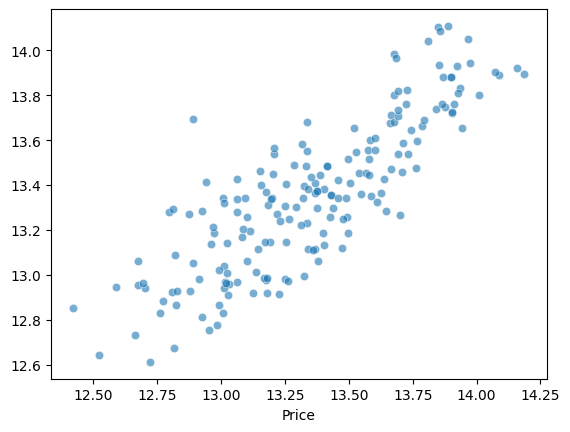

In [226]:
# Best model: Combined features model

X = cars_encoded.drop(columns=["Price"])
y = cars_encoded["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression().fit(X_train,Y_train)
predictions = reg.predict(X_test)

sns.scatterplot(x=Y_test, y=predictions, alpha=0.6)

Yes, the datapoints roughly cluster around the diagonal.

<Axes: xlabel='Price', ylabel='Density'>

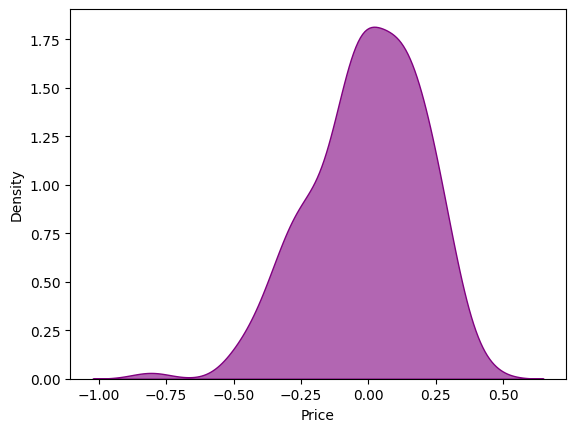

In [227]:
# kde for residuals

residuals = Y_test - predictions

sns.kdeplot(residuals, fill=True, color="purple", alpha=0.6)


Yes, the residuals appear in a bell-shaped distribution around 0. The model has strength in that it is successful in predicting a general sense of the data/the shapes appear as they should for a good fit. One weakness of the model is that there appear to be some outliers in the kde model, which implies that the model does not handle outliers in the data well. This also showed through the variability of outputted r-squared and rmse values from re-running the cell blocks. Although they tended to cluster around a value, there would be an occasional super negative r squared or innaccurate rmse. To prevent this, the data could be cleaned better to decrease the impact outliers have on the model's predictions.

# Q3

In [243]:
# import bee data

honey_data = pd.read_csv("/content/drive/My Drive/US_honey_production_dataset.csv")
#print(honey_data.dtypes)

# variables:
# state - char (obj)
# colony_number ( number of colonies in the state) - int
# yield_per_colony - pounds of honey - int
# productions - total honey production (number of colonies * yield) - int
# stocks - stock held by producers (beekeepers or whatever) - int
# average_price - price per pound  (float)
# value_of_prod   - int
# year - int - 2010 or 2011 -- turn categorical

num_cols = ["colony_number","yield_per_colony","productions","stocks","average_price","value_of_prod"]
# honey_data[num_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), sharex=False, sharey=False, notch=True)
# boxplots showed lots of outliers so need to clean

# log
honey_data[num_cols] = np.log(honey_data[num_cols])

#honey_data[num_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), sharex=False, sharey=False, notch=True)
# looks much better

# one hot encode year
honey_data2 = pd.get_dummies(honey_data, columns=["year"], drop_first = True)

# chosen target: average_price
# chosen features: colony_number, yield_per_colony, productions, stocks, value_of_prod

X = honey_data2.drop(columns=["state","average_price"])
y = honey_data2["average_price"]

# train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression().fit(X_train, Y_train)

r_squared = reg.score(X_test, Y_test)
predictions = reg.predict(X_test)
rmse = np.sqrt(np.mean((Y_test - predictions) ** 2))
print(r_squared, rmse)
# this shows a very good fit for the data. r squared is very very close to 1 and
# rmse is very close to 0, where the goal is to approach 1 with r squared
# and minimize rmse.

# r squared = 0.999999 , rmse = 0.0001

# Just to see how removing features affects the model, I will take out
# year and yield_per_colony.




0.9999999957384674 0.00014204355486188678


In [244]:
X = honey_data.drop(columns=["state","average_price","year"])
y = honey_data["average_price"]

# train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression().fit(X_train, Y_train)

r_squared = reg.score(X_test, Y_test)
predictions = reg.predict(X_test)
rmse = np.sqrt(np.mean((Y_test - predictions) ** 2))
print(r_squared, rmse)
# r squared = 0.727, rmse = 1.1

# note: this is a much worse model. This shows how the two removed features were
# important to the predictions.

0.7274665028087236 1.1046310873869447


The model with the maximum number of features (besides state, as a character vector) was the most effective. The goal of linear regression is to minimise the error (mean squared error in this calculation) between the predicted values and the actual values in the test dataset. In the first regression with the maximum number of features included, the rmse was minimized (closest to zero), and the r squared was maximized (closest to 1), demonstrating a very good fit to the testing data. This means that the features I chose are all very connected to the average price of the honey per pound (my target variable). Overall, I learned that adding complexity can often confuse the model and add unneccessary noise/overfit the training set and not apply as well to the testing set. I also learned that the more you clean your data to handle outliers, the better your model will fit the data. Cleaning and understanding the data is a necessary step in the linear regression process.